### Data Cleaning and Wrangling

#### initial review - shape, type and content

In [91]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
pd.set_option('display.max_columns', None)

In [3]:
## loading data into a Pandas DataFrame
data = pd.read_excel('C:/Users/ivanr/Downloads/mid-bootcamp-project-details/classification/creditcardmarketing.xlsx')

In [4]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


We need to standardize headers names.
We can drop column 'customer number' because it is irrelevante for our model.

In [18]:
## Standardizing headers
data.columns = list(map( lambda x: x.lower().replace(' ', '_').lstrip(' _#'), data.columns))
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [19]:
## Dropping column
data = data.drop('customer_number', axis=1)

In [5]:
data.shape

(18000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

We can notice that in balance columns there are null values.

In [20]:
##  Checking for duplicates
data_duplicates=data.duplicated().any()
data_duplicates

False

In [21]:
round(data.describe())

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.0,18000.0,18000.0,18000.0,17976.0,17976.0,17976.0,17976.0,17976.0
mean,1.0,2.0,1.0,3.0,941.0,910.0,999.0,1042.0,810.0
std,0.0,1.0,0.0,1.0,350.0,620.0,457.0,553.0,559.0
min,1.0,1.0,1.0,1.0,48.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,3.0,788.0,393.0,663.0,633.0,363.0
50%,1.0,2.0,1.0,3.0,1007.0,772.0,1032.0,946.0,703.0
75%,1.0,2.0,1.0,4.0,1153.0,1521.0,1342.0,1463.0,1212.0
max,3.0,4.0,3.0,9.0,3366.0,3450.0,3421.0,3823.0,4215.0


In [26]:
data.dtypes

offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

All data types looks correct and for now we will keep it like it is.

In [23]:
## checking value counts for all categorical columns
for col in data.select_dtypes(np.object).columns:
    print("column name: ", col)
    print(data[col].value_counts())
    print('\n')        

column name:  offer_accepted
No     16977
Yes     1023
Name: offer_accepted, dtype: int64


column name:  reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64


column name:  mailer_type
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64


column name:  income_level
Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64


column name:  overdraft_protection
No     15322
Yes     2678
Name: overdraft_protection, dtype: int64


column name:  credit_rating
High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64


column name:  own_your_home
Yes    11655
No      6345
Name: own_your_home, dtype: int64




No odd entries so no cleaning is required.

In [24]:
## checking value counts for all numerical columns
for col in data.select_dtypes(np.number).columns:
    print("column name: ", col)
    print(data[col].value_counts())
    print('\n')

column name:  bank_accounts_open
1    13692
2     4012
3      296
Name: bank_accounts_open, dtype: int64


column name:  credit_cards_held
2    7944
1    6154
3    3387
4     515
Name: credit_cards_held, dtype: int64


column name:  homes_owned
1    14523
2     3292
3      185
Name: homes_owned, dtype: int64


column name:  household_size
3    5712
4    5543
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64


column name:  average_balance
1127.00    17
1070.00    16
1036.00    16
1078.50    16
1053.50    16
1033.00    16
1153.75    15
988.00     15
1125.00    15
1065.75    15
1173.25    15
1083.00    15
1094.50    15
1025.75    15
1056.25    15
1102.00    15
989.25     15
990.00     14
1033.25    14
999.00     14
1065.00    14
1108.25    14
1004.75    14
979.00     14
1029.50    14
1065.25    14
1040.50    14
1011.25    14
1052.50    14
1104.50    14
1071.00    14
994.50     14
1006.00    14
1090.50    13
1007.00    13
1055.25    13
1087.25 

809.0     30
833.0     27
997.0     26
842.0     26
972.0     26
994.0     25
970.0     24
835.0     24
876.0     23
882.0     23
868.0     23
914.0     23
569.0     23
928.0     23
857.0     23
933.0     23
621.0     22
798.0     22
964.0     22
926.0     22
680.0     22
829.0     22
992.0     22
815.0     21
899.0     21
978.0     21
990.0     21
987.0     21
758.0     21
727.0     21
662.0     21
908.0     21
975.0     21
870.0     21
915.0     21
803.0     21
736.0     21
866.0     21
854.0     20
812.0     20
903.0     20
875.0     20
921.0     20
976.0     20
942.0     20
825.0     20
821.0     20
900.0     20
936.0     20
558.0     20
912.0     20
934.0     20
827.0     19
572.0     19
838.0     19
929.0     19
777.0     19
589.0     19
948.0     19
950.0     19
571.0     19
945.0     19
579.0     19
594.0     19
681.0     19
563.0     19
839.0     19
952.0     19
896.0     19
865.0     19
781.0     18
718.0     18
985.0     18
996.0     18
831.0     18
877.0     18
971.0     18

We notice we have a very small representation of customers that:

have 3 bank accounts open
have 4 credit cards
own 3 houses
live in household of more than 6 people

Also, we have 5 columns that represent balance.

#### Data Cleaning

Data is relatively clean, we only need to check null values and to see can we get more benefit with using any discrete data like categorical.

We will start with by checking the percentage of nulls:

In [28]:
## checking precentage of nulls in data
data.isna().sum()/len(data)*100

offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

Amount of nulls is small but we can easly fill out nulls and keep records.

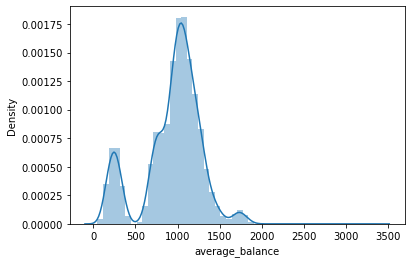

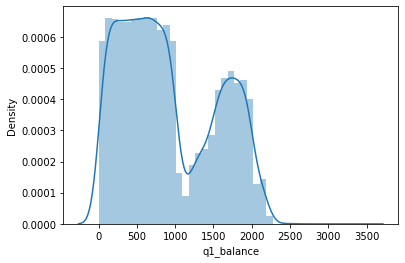

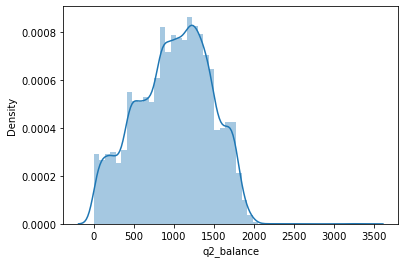

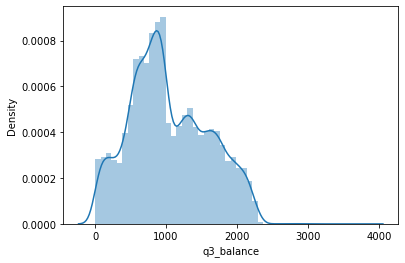

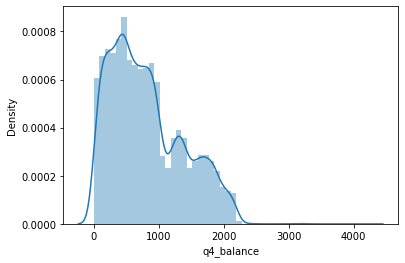

In [37]:
## checking distribution for balance columns
balance_col = data[['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']]

for col in balance_col.columns:
    sns.distplot(balance_col[col])
    plt.show()

We note that the average, q2 & q3 balances have relatively normal distributions so we decided to fill nulls with mean, where q1 and q4 are skewed so it is better to use median for nulls.



In [44]:
## Function to fill null values in a column with the mean of the column
def fill_nulls_with_mean(data, col):
    
    mean_val = data[col].mean(skipna=True)
    
    data[col].fillna(value=mean_val, inplace=True)
    
    return data

In [ ]:
## applying function and checking for null

In [42]:
fill_nulls_with_mean(data, 'average_balance')
data['average_balance'].isna().sum()

0

In [47]:
fill_nulls_with_mean(data, 'q2_balance')
data['q2_balance'].isna().sum()

0

In [48]:
fill_nulls_with_mean(data, 'q3_balance')
data['q3_balance'].isna().sum()

0

In [50]:
##  Function to fill null values in a column with the median value
def fill_nulls_with_median(df, col):

    median = df[col].median()  
    
    df[col] = df[col].fillna(median)
    
    return df

In [52]:
fill_nulls_with_median(data, 'q4_balance')
data['q4_balance'].isna().sum()

0

In [53]:
fill_nulls_with_median(data, 'q1_balance')
data['q1_balance'].isna().sum()

0

### EDA

#### Categorical and discrete numerical columns

In [60]:
# Split the numerical data into discrete & continuous data

def split_numerical(data, threshold=10):
    numericals = data.select_dtypes(np.number)
    cont_columns = [col for col in numericals.columns 
        if len(numericals[col].unique()) > threshold]
    disc_columns = [col for col in numericals.columns 
        if len(numericals[col].unique()) <= threshold]
    num_cont = data.loc[:, cont_columns]
    num_disc = data.loc[:, disc_columns]
    return num_cont, num_disc

num_cont, num_disc = split_numerical(data)


In [62]:
# Split data into numericals and categoricals

numericals  = data.select_dtypes(np.number)
categoricals = data.select_dtypes(np.object)

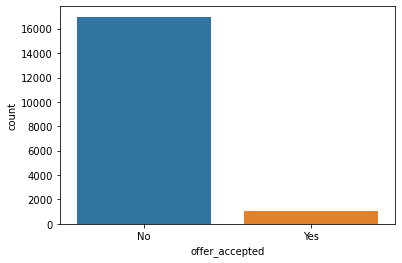

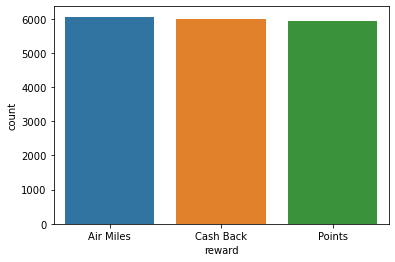

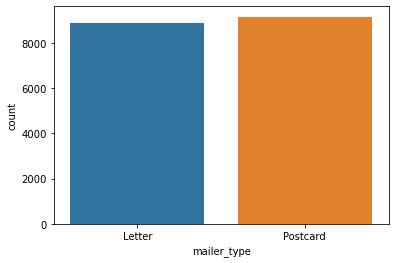

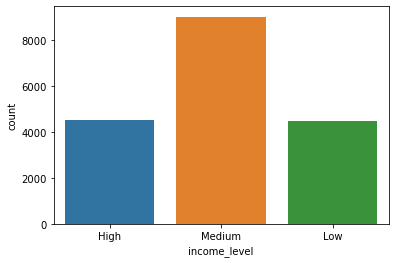

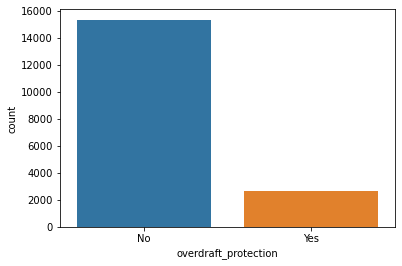

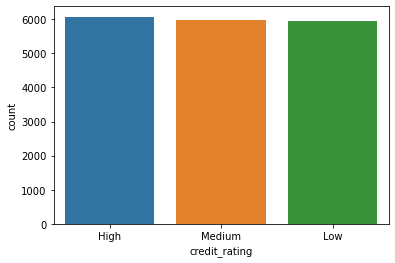

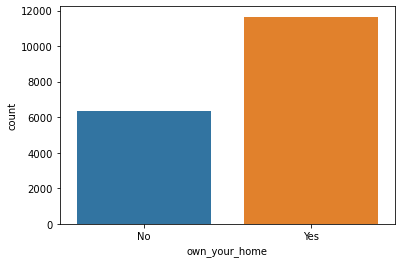

In [70]:
# creating countplots for all categorical data
for col in categoricals:
    sns.countplot(data=categoricals, x=col)
    plt.show()

We notice that the offer_accepted(target), overdraft_protection, and home_owner are imbalanced.

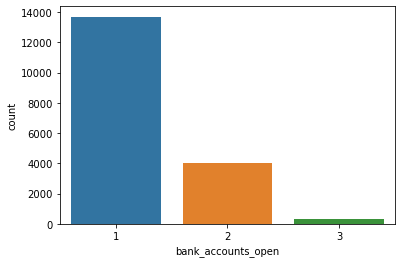

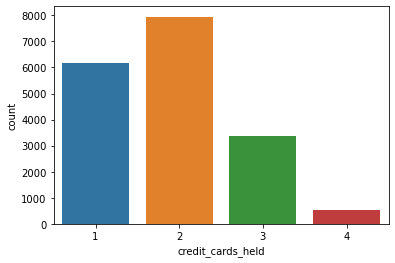

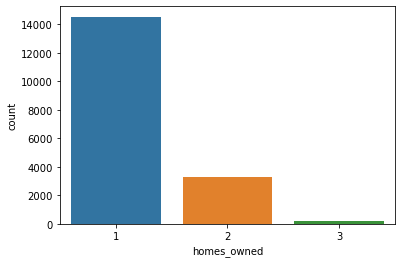

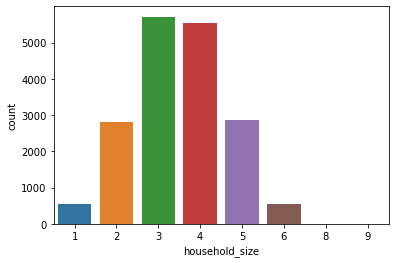

In [71]:
# creating countplots for all discrete data
for col in num_disc:
    sns.countplot(data=num_disc, x=col)
    plt.show()

From plotting discrete data we can see that customers:
  
-opened more than 2 accounts
-have 4 credit cards
-living in the households with 8 or 9 people
-own 3 houses

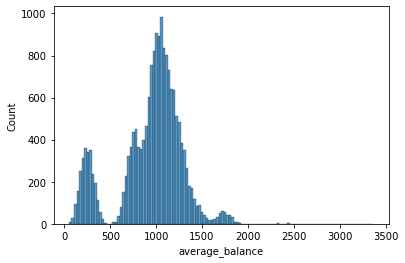

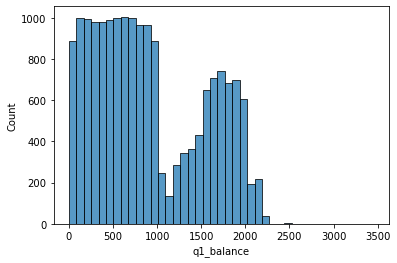

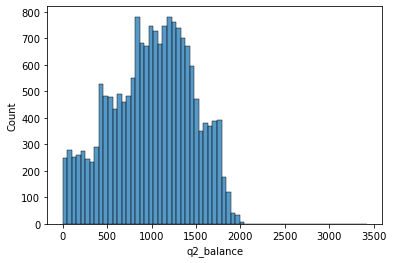

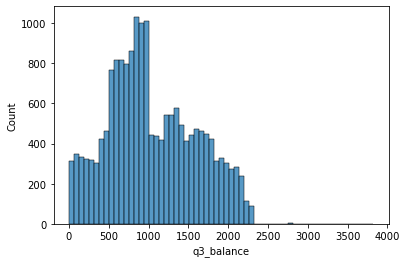

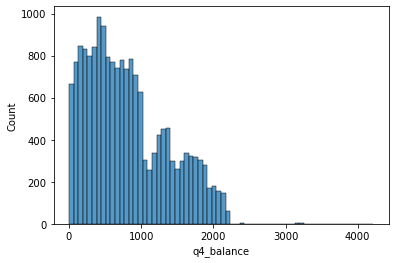

In [73]:
# Cheking distribution for continuous
for col in num_cont:
    sns.distplot(data=num_cont, x=col)
    plt.show()

Average, q2 and q3 balances have relatively normal distributions but q1 and q4 are not normally distributed.

We can also check is there any correalation in numerical data:

<AxesSubplot:>

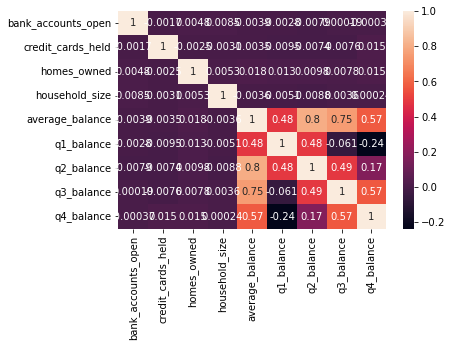

In [76]:
corr_matrix = numericals.corr()
sns.heatmap(corr_matrix, annot=True)

In [77]:
# checking does average_balance represent average of all other balance columns
(data['q1_balance']+data['q2_balance']+data['q3_balance']+data['q4_balance'])/4

0        1160.750000
1         147.250000
2         276.500000
3        1219.000000
4        1211.000000
5        1114.750000
6         283.750000
7         278.500000
8        1005.000000
9         974.250000
10       1135.250000
11       1221.000000
12       1150.500000
13       1052.250000
14       1013.250000
15       1012.250000
16       1217.000000
17       1185.250000
18       1059.750000
19       1086.750000
20       1175.250000
21        811.750000
22       1754.000000
23        689.500000
24       1018.250000
25       1130.250000
26        877.000000
27        769.500000
28        709.000000
29        690.000000
30        863.250000
31        733.000000
32        771.000000
33        659.500000
34       1258.000000
35        875.250000
36        675.750000
37       1095.750000
38       1285.000000
39       1079.250000
40       1119.750000
41        172.000000
42        834.750000
43       1044.750000
44        838.750000
45        851.250000
46       1040.250000
47        987

How we expected, there is high to moderate correlation between balance columns. In the future modeling we might use only average_balance.

We can check how our target is correlated with other columns:

In [81]:
numericals.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [85]:
offer_hh = pd.crosstab(data['offer_accepted'], data['household_size'])
print(offer_hh)

household_size    1     2     3     4     5    6  8  9
offer_accepted                                        
No              496  2662  5367  5232  2708  511  1  0
Yes              43   151   345   311   145   27  0  1


In [82]:
offer_acc_open = pd.crosstab(data['offer_accepted'], data['bank_accounts_open'])
print(offer_acc_open)

bank_accounts_open      1     2    3
offer_accepted                      
No                  12916  3778  283
Yes                   776   234   13


In [84]:
offer_credit_rating = pd.crosstab(data['offer_accepted'], data['credit_rating'])
print(offer_credit_rating)

credit_rating   High   Low  Medium
offer_accepted                    
No              5952  5324    5701
Yes              119   633     271


Here we can see that mostly customers who have low credit rating accepted the offer.

We can check does balance is related to decision either customer accepted or reject offer:

In [87]:
# calculate mean value of average_balance for each value of offer_accepted
grouped = data.groupby('offer_accepted')['average_balance'].mean()

print(grouped)

offer_accepted
No     940.848462
Yes    934.990988
Name: average_balance, dtype: float64


Cheking the possible correlation between categorical variables:

In [89]:
categoricals.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


In [103]:
income_rating = pd.crosstab(data['income_level'], data['credit_rating'])
chiSqResult = chi2_contingency(income_rating)
print(chiSqResult[1])

0.5394378509869674


In [104]:
income_own_home = pd.crosstab(data['income_level'], data['own_your_home'])
chiSqResult = chi2_contingency(income_own_home)
print(chiSqResult[1])

0.34474354539171537


In [105]:
mailer_protection = pd.crosstab(data['mailer_type'], data['overdraft_protection'])
chiSqResult = chi2_contingency(mailer_protection)
print(chiSqResult[1])

0.7176965316712962


From the examples above we can see that there is no correlation between variables.

In [107]:
# Save clean dataframe to a new  file to be used in further analysis
data.to_csv('clean_creditcardmarketing.csv')